In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [30]:
x_data = gdal.Open('F:/wenqu/trait_map/site2a_clip/4_25.tif').ReadAsArray().flatten()

In [31]:
#plotting the histogram
# compute the histogram of a dataset, it returnns two arrays
# the number of values fallinng into the bin and the bin edges half-open, except last one
hist, bin_edges = np.histogram(x_data)
hist=hist/sum(hist)

In [32]:
hist.shape

(10,)

In [33]:
bin_edges.shape

(11,)

In [34]:
n = len(hist)
x_hist=np.zeros((n),dtype=float) 
# middle value for each bin, has the same shape as y_hist
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
# number of values falling into each bins - probability     
y_hist=hist

In [35]:
x_hist.shape, y_hist.shape

((10,), (10,))

In [36]:
#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gaus(X,C,X_mean,sigma):
    return C*exp(-(X-X_mean)**2/(2*sigma**2))

mean = sum(x_hist*y_hist)/sum(y_hist)                  
sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

In [37]:
#Gaussian least-square fitting process
# using nnon-linear least squares to fit a function
# model function; x data, y data; 
param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

C:\Users\15086\AppData\Local\Temp\ipykernel_25092\871226853.py:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


In [38]:
param_optimised.shape,param_covariance_matrix.shape

((3,), (3, 3))

In [39]:
param_optimised, param_optimised[0]

(array([ 0.77277786,  0.00821852, -0.01467398]), 0.7727778636393131)

In [40]:
max(y_hist),mean,sigma

(0.7726828401315204, 0.02217994190861422, 0.0021443992563119725)

In [41]:
param_optimised[:2]

array([0.77277786, 0.00821852])

C:\Users\15086\AppData\Local\Temp\ipykernel_25092\871226853.py:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


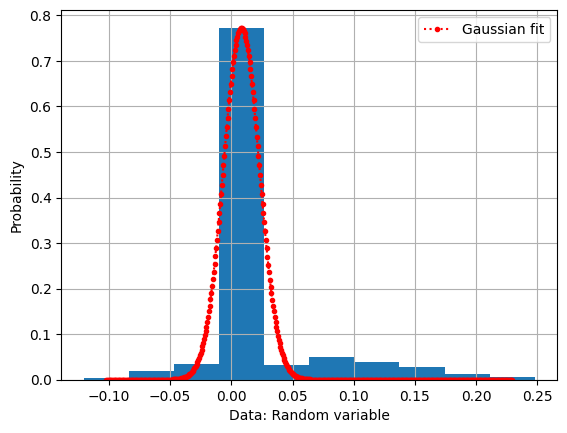

In [42]:
fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')
plt.legend()

#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights)

#setting the label,title and grid of the plot
plt.xlabel("Data: Random variable")
plt.ylabel("Probability")
plt.grid("on")
plt.show()

In [44]:
param_optimised[1]

0.008218518311645977

C:\Users\15086\AppData\Local\Temp\ipykernel_25092\871226853.py:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


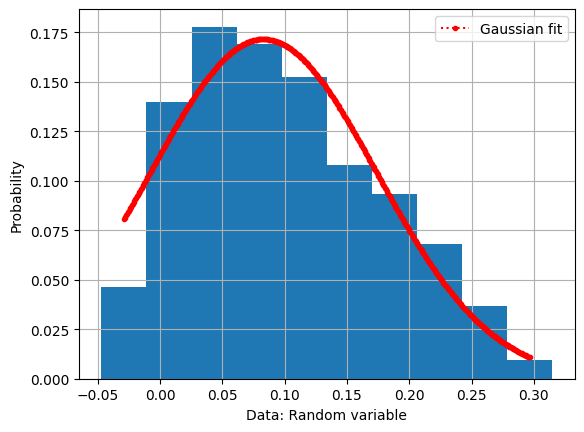

In [15]:
fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')
plt.legend()

#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights)

#setting the label,title and grid of the plot
plt.xlabel("Data: Random variable")
plt.ylabel("Probability")
plt.grid("on")
plt.show()

C:\Users\15086\AppData\Local\Temp\ipykernel_25092\871226853.py:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))


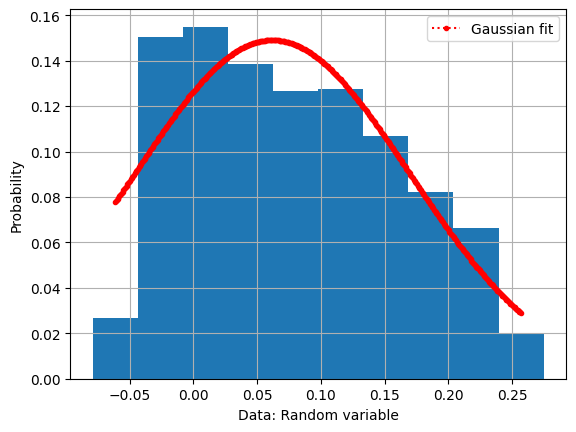

In [29]:
fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r.:',label='Gaussian fit')
plt.legend()

#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, weights=weights)

#setting the label,title and grid of the plot
plt.xlabel("Data: Random variable")
plt.ylabel("Probability")
plt.grid("on")
plt.show()